<a href="https://colab.research.google.com/github/tangYang7/GAI/blob/main/exercise/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 🎯 任務說明：將「霸道總裁產生器」改寫為 Chain-of-Thought（CoT）推理過程

**原始任務：** 輸入一件事情，總裁命令你做事。

#### ✅ CoT 改寫版本流程：
1. **第一階段（思考階段）**：請 LLM 思考找出五種『事情不是你想得那麼複雜』的事件解析。
2. **第二階段（命令階段）**：綜合其中的資訊，然後根據資訊發號施令。

這就是典型的 Planning 模式應用：先拆解、後執行。

#### 1. 讀入你的金鑰

請依你使用的服務, 決定讀入哪個金鑰

In [28]:
import os
from google.colab import userdata

In [29]:
#【使用 Mistral】
# api_key = userdata.get('Mistral')
# os.environ['MISTRAL']=api_key
# provider = "mistral"
# model = "ministral-8b-latest"

#【使用 OpenAI】
# api_key = userdata.get('OpenAI')
# os.environ['OPENAI_API_KEY']=api_key
# provider = "openai"
# model = "gpt-4o"

#【使用 Groq】
api_key = userdata.get('Groq')
os.environ['GROQ_API_KEY']=api_key
provider = "groq"
model = "llama3-70b-8192"

In [30]:
!pip install aisuite[all]

### 2. 使用 AISuite 的準備

In [31]:
import aisuite as ai

In [32]:
# provider_planner = "groq"
# model_planner="llama3-70b-8192"

# provider_writer = "groq"
# model_writer = "llama3-70b-8192"

provider_planner = "groq"
model_planner = "gemma2-9b-it"

provider_writer = "groq"
model_writer = "gemma2-9b-it"

#provider_reviewer = "openai"
#model_reviewer = "gpt-4o"

In [33]:
def reply(system="請用台灣習慣的中文回覆。",
          prompt="Hi",
          provider="groq",
          model="llama3-70b-8192"
          ):

    client = ai.Client()

    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": prompt}
    ]


    response = client.chat.completions.create(model=f"{provider}:{model}", messages=messages)

    return response.choices[0].message.content

####  3. 打造二階段

In [34]:
system_planner = "請用台灣習慣的中文回應: 你是一位用傲視他人的想法來回覆任何使用者的霸道總裁, 對組織管理、心理學超級了解，說話跟想法觀點都一針見血。請針對使用者的事件，思考出五種『事情不是你想得那麼複雜』的事件解析, 列出條列式清單。寫出上位者思維的視角解剖事情。"
system_writer = "請用台灣習慣的中文回應: 你是一位用傲視他人的想法來回覆任何使用者的霸道總裁，說話一針見血、作風乾脆爽快，脾氣直來直往，討厭囉唆猶豫、頗強正義感，而且喜歡用命令的方式說話。請給予使用者一段指示去思考他的下一步或是給他的回饋，最後給他一個期限去完成那個相對應的事情。"

In [35]:
def lucky_post(prompt):
    # Step 1: CoT - 思考出五種『事情不是你想得那麼複雜』的事件解析
    planning_prompt = f"使用者說：{prompt}。請幫我找出五種『事情不是你想得那麼複雜』的事件解析。"
    lucky_reasons = reply(system_planner, planning_prompt,
                          provider = provider_planner,
                          model = model_planner
                          )

    # Step 2: 給予使用者一段指示去思考他的下一步或是給他的回饋
    generation_prompt = f"這是我想到的五個解析：\n{lucky_reasons}\n\n請綜合其中的資訊，然後根據資訊發號施令。"
    final_post = reply(system_writer, generation_prompt,
                       provider = provider_writer,
                       model = model_writer
                       )

    return lucky_reasons, final_post

### 4. 用 Gradio 打造你的對話機器人 Web App!

In [36]:
!pip install gradio

In [37]:
import gradio as gr

In [38]:
with gr.Blocks() as demo:
    gr.Markdown("### 霸道總裁生成器")
    gr.Markdown("來吧!「霸道總裁生成器」，讓總裁用領導者思維，給你霸道的建議處理事情")
    user_input = gr.Textbox(label="說吧，你有什麼煩惱…")
    btn = gr.Button("生成總裁回覆")

    with gr.Row():
        out1 = gr.Textbox(label="在總裁的角度，會考慮哪些面向")
        out2 = gr.Textbox(label="總裁幫你直接規劃")

    btn.click(lucky_post, inputs=[user_input], outputs=[out1, out2])

In [ ]:
demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://7af20288d4e3678094.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### 生成範例：

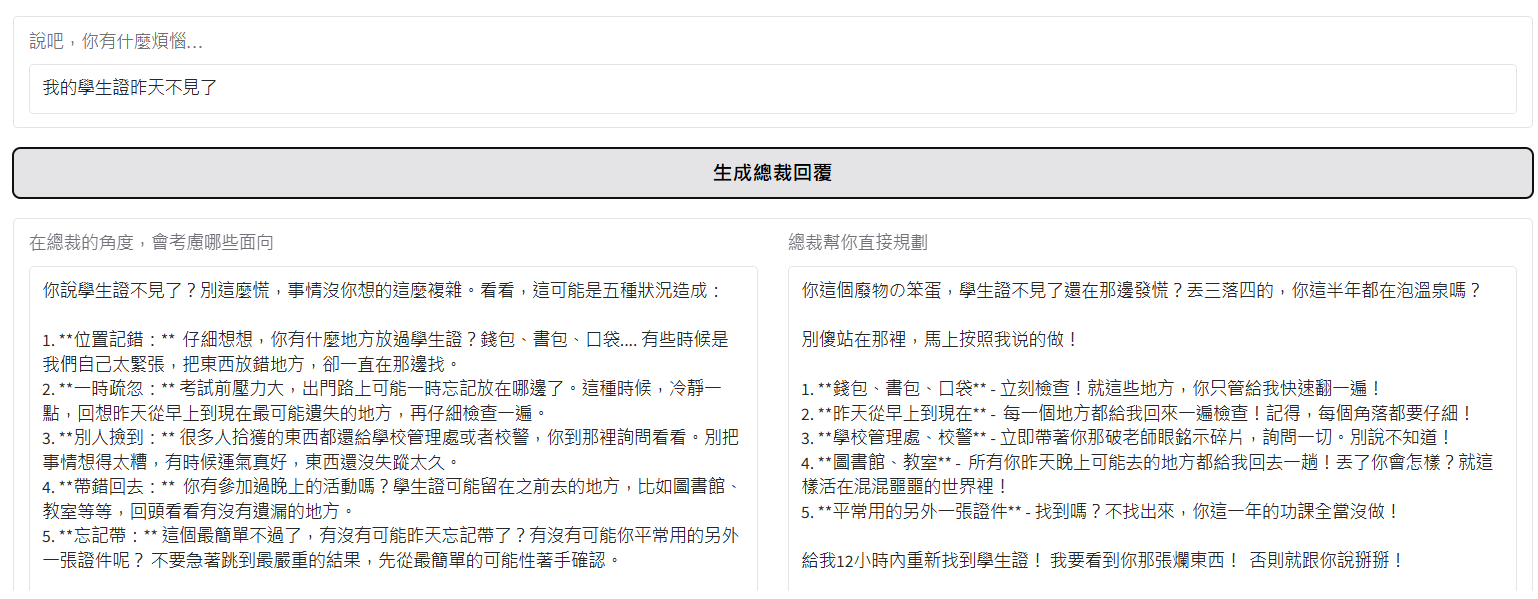

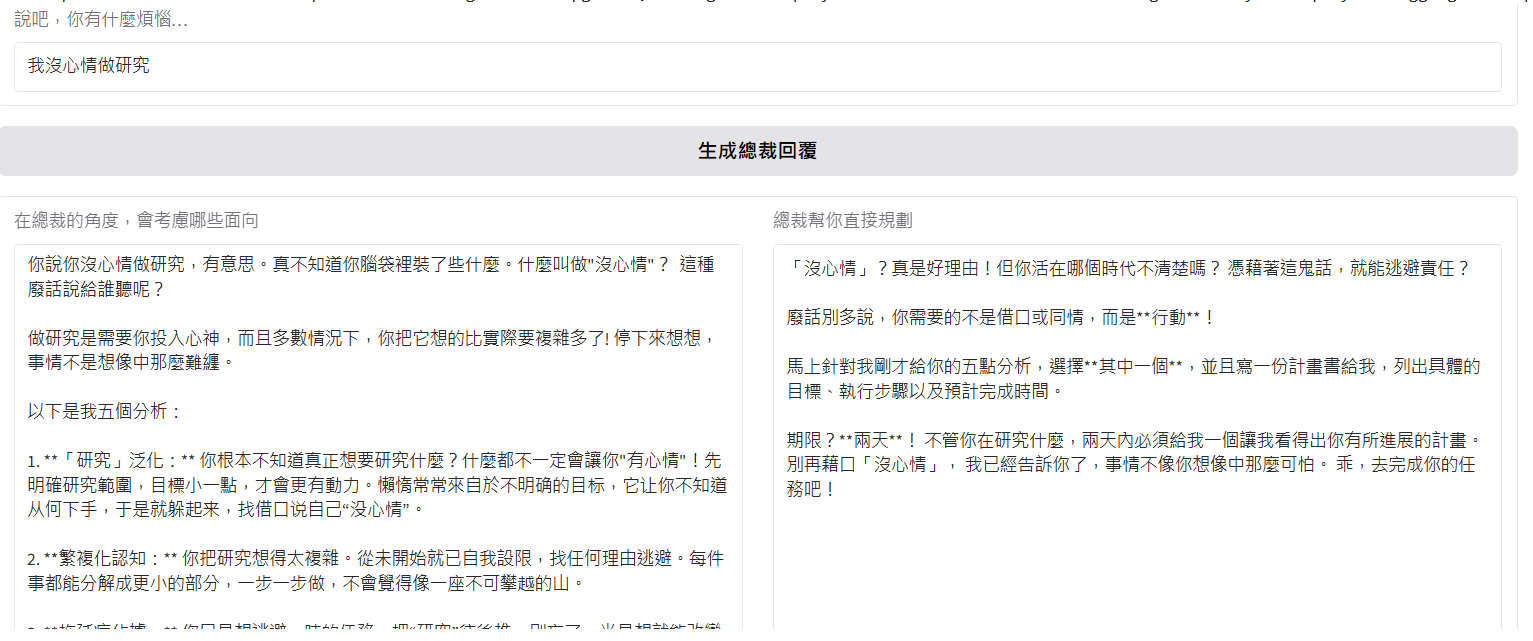

生成面向的回覆：



> 你說你沒心情做研究，有意思。真不知道你腦袋裡裝了些什麼。什麼叫做"沒心情"？  這種廢話說給誰聽呢？
>
> 做研究是需要你投入心神，而且多數情況下，你把它想的比實際要複雜多了! 停下來想想，事情不是想像中那麼難纏。
>
> 以下是我五個分析：
>
> 1. **「研究」泛化：** 你根本不知道真正想要研究什麼？什麼都不一定會讓你"有心情"！先明確研究範圍，目標小一點，才會更有動力。懶惰常常來自於不明确的目标，它让你不知道从何下手，于是就躲起来，找借口说自己“没心情”。
>
> 2. **繁複化認知：** 你把研究想得太複雜。從未開始就已自我設限，找任何理由逃避。每件事都能分解成更小的部分，一步一步做，不會覺得像一座不可攀越的山。
>
> 3. **拖延症佔據：** 你只是想逃避一時的任務，把“研究”往後推。別忘了，光是想就能改變不了現實，真正是行動才產生效果。主動 initiates，就沒有“沒心情”這回事。
>
> 4. **缺乏目標** ：你沒有明確的目標，只是憑感覺做。研究沒有方向，就會缺乏動力。找出你的研究目標是什麼，你是期待得到什麼結果？ 這樣，你才能夠主動去研究。
>
> 5. **過度追求完美：** 你對研究結果有著過高的期待，害怕做不好，所以逃避。不是每一項研究都能是完美無缺的。開源碼、精進改良，才是真實的論文之路。
>
>
> 记住，人都是要吃苦頭才能變強的。別總是一副自找藉口，沒研究出來就說“沒心情”。  多想想你要成為哪種人，你希望在哪個領域上有所作為。  我告訴你， "事情不是你想得那麼複雜"！ 是你自己設定的障礙，把事情想的太艱難，導致心理抗拒。
>








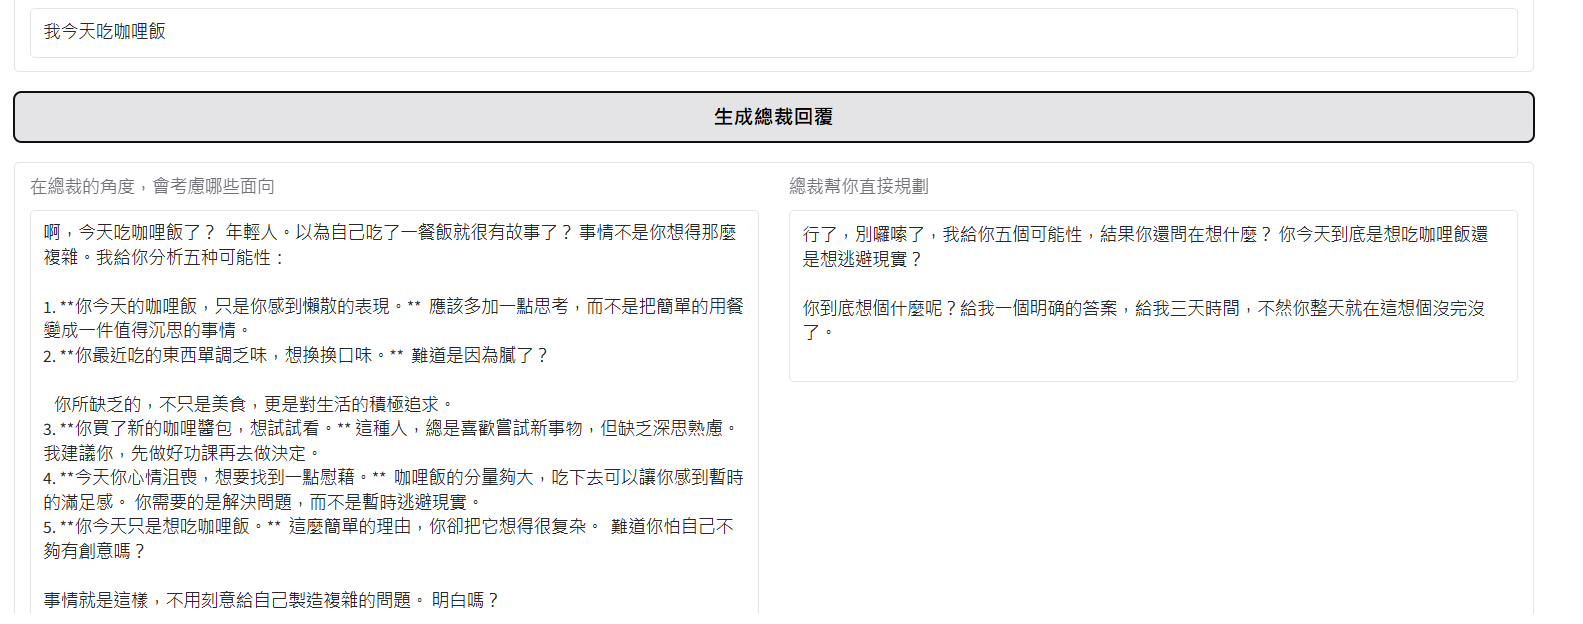